<a href="https://colab.research.google.com/github/debashray/Machine_Learning/blob/main/Exploratory_Data_Analysis_on_Haberman_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries - Numpy,pandas and visualization libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Loading dataset from local

In [ ]:
from google.colab import files
files=files.upload()

Saving haberman.csv to haberman.csv


In [ ]:
data = pd.read_csv('haberman.csv')

In [ ]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Checking mean,deviation, and data at different percentile ranges to get an understanding of the data spread

In [ ]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Above result shows that there are 306 records in the haberman dataset with 3 features and 1 class attribute(status - either 1 or 2), maximum nodes in the dataset is 52 whereas minimum and maximum age of patient records in the dataset is 30 and 83 respectively

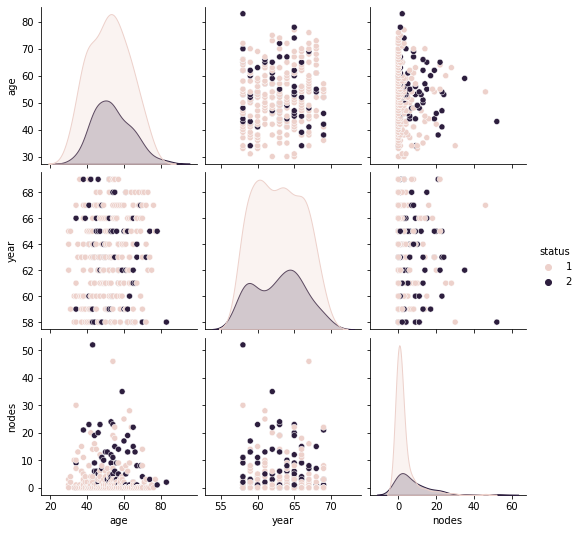

In [ ]:
sns.pairplot(data,hue="status")

The above pair plots help me understand the relationship between each attribute

Text(0, 0.5, 'Count')

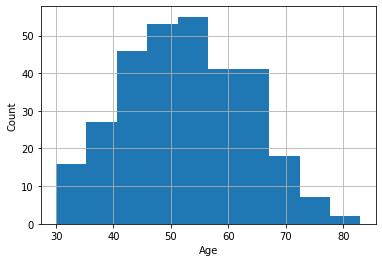

In [ ]:
x = data['age'].hist(bins=10)
x.set_xlabel ("Age")
x.set_ylabel("Count")

Above histogram plot shows a normal distribution when we plot count of patients vs age - the histogram plot gives a clearer understanding of the data decription. The mean of the above plot is around 52 and the overall spread is from 30 to 83 age range

Text(0, 0.5, 'Count')

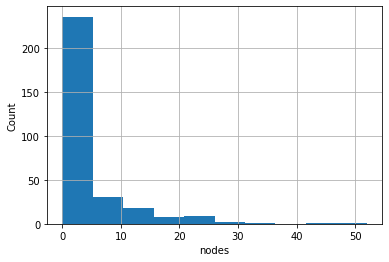

In [ ]:
y = data['nodes'].hist(bins=10)
y.set_xlabel ("nodes")
y.set_ylabel("Count")

To get an understanding of the distribution of nodes in the overall dataset,the above histogram tells that the majority of patients have 0-5 nodes and the distribution is right-skewed

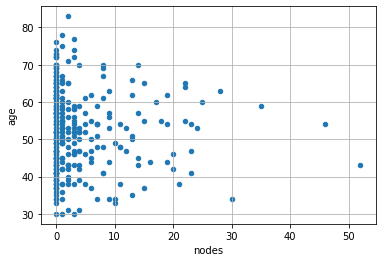

In [ ]:
data.plot(kind ='scatter', x = 'nodes', y = 'age')
plt.grid()

The above scatter plot helps visualize the node vs age relationship,distribution of age is even for patients with 0 - 10 nodes but with nodes>=30, age of patients is less than 60, but this isn't conclusive as there are very few data points for nodes >=30

Plotting PDF and CDF for the given data - to understand which features are useful for classification

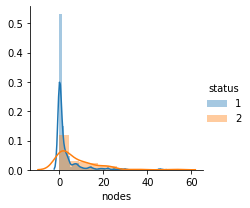

In [ ]:
sns.FacetGrid(data,hue="status").map(sns.distplot,"nodes").add_legend()

Above plot shows that if nodes <=0, then chances of patient survival is high
also if 0<nodes<5, then chances of patient survival is high


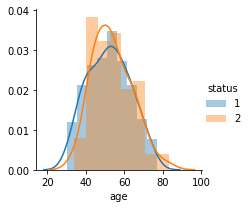

In [ ]:
sns.FacetGrid(data,hue="status").map(sns.distplot,"age").add_legend()

As both the distributions almost overlap, nothing much can be concluded here

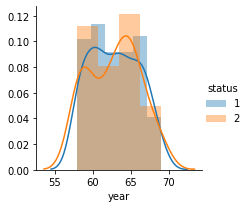

In [ ]:
sns.FacetGrid(data,hue="status").map(sns.distplot,"year").add_legend()

Similar overlap as in the case of age

In [ ]:
survive_1 = data.loc[data["status"]==1] ##survived 
survive_2 = data.loc[data["status"]==2] ##notsurvived
counts, bins = np.histogram(survive_1['nodes'], bins=10)

pdf = counts/(sum(counts)) ##survived pdf
print(pdf);

cdf = np.cumsum(pdf) ##survived cdf
print(cdf);


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


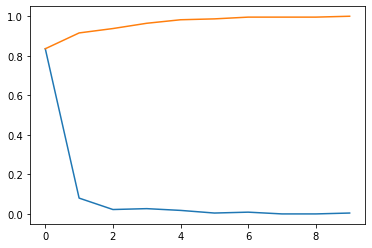

In [ ]:
plt.plot(pdf);
plt.plot(cdf)

In [ ]:
counts2, bins2 = np.histogram(survive_2['nodes'], bins=10)

pdf2 = counts2/(sum(counts2)) ##notsurvived pdf
print(pdf2);

cdf2 = np.cumsum(pdf2)  ##notsurvived cdf
print(cdf2);


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


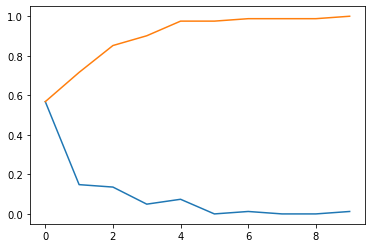

In [ ]:
plt.plot(pdf2);
plt.plot(cdf2)

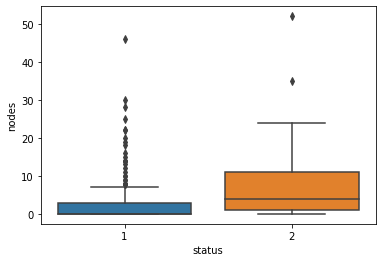

In [ ]:
sns.boxplot(x='status',y='nodes',data= data)

Above Boxplot for Nodes vs status distribution for status = 2(patient survival less than 5 years) shows a better spread over nodes(Q1 ~ 0,Q3 ~ 11) in comparison to patients who survived more than 5 years (Q1 ~ 0,Q3 ~3). 

Also, we see more outliers concentrated above Q3 + 1.5 IQR in case where patient survival is more than 5 years


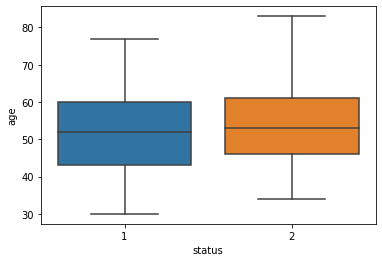

In [ ]:
sns.boxplot(x='status',y='age',data = data)

Above age vs status boxplot shows an even distribution - 
Status 1(patient survival > 5 years) - Q1 ~ 42 , Q3 ~ 60, Median ~52

Status 2(patient suvival < 5 years) - Q1 ~ 45 , Q3 ~ 61, Median ~54

Median age for status 2 patients is marginally higher than status 1 

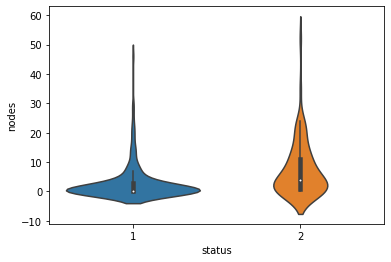

In [ ]:
sns.violinplot(x='status',y='nodes',data=data)

Violin plot interpretaion is similar to the box plot above

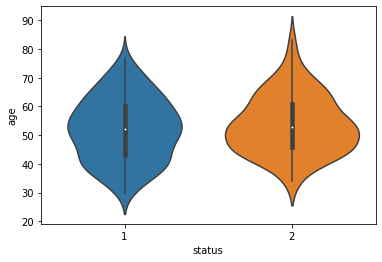

In [ ]:
sns.violinplot(x='status',y='age',data=data)